In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import LassoSelectTool, CrosshairTool, HoverTool

In [ ]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### Define the path to the file (a string in a variable 'db_file')
db_file = '../../data/astronomers_import.db'

In [119]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
cn = sql.connect(db_file)
# Le contenu de la variable: connexion
cn

## Récupérer les dates de  naissances

* On doit choisir l'URI de la propriété correspondante dans son propre jeu de données.
* Ça peut directement être l'année, ou alors la date ISO: dans ce cas, il faudra extraire l'année
* Si d'autres valeurs 'sales' ou incohérentes sont présentes il faudra traiter au cas par cas

In [120]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT birth_year 
FROM person p
order by birth_year 
"""

In [121]:
### Création du conteneur du résultat de la requête
cur = cn.cursor()
cur

In [122]:
### Exécuter la requête et récupérer le résultat
cur.execute(q1)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()
cn.close()

In [123]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de naissance
print(len(r), '\n-----\n', type(r),  '\n-----\n', r[:5])

519 
-----
 <class 'list'> 
-----
 [(1359,), (1394,), (1447,), (1453,), (1470,)]


## Python control structures

Read and treat each element (e) of a list 
* A [Python list](https://datacarpentry.github.io/python-socialsci/02-basics.html#the-list)
* [*for* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-for-loop) (Datacarpentry tutorial)
* [*while* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-while-loop)
* [*if* statement](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-if-statement-and-variants)

In [103]:
### Result of SQL query: list of tuples
# five first elements
print(r[:5], '\n---')
# access the values
print(r[0], r[1], r[1][0])

[(1359,), (1394,), (1447,), (1453,), (1470,)] 
---
(1359,) (1394,) 1394


In [105]:
# 'for' loop on the first five elements
for e in r[:5]:
    print(e[0])

1359
1394
1447
1453
1470


In [106]:
# 'while' loop on the first five elements
i = 0
while i < 5 :
    print(r[i][0])
    i += 1

1359
1394
1447
1453
1470


In [110]:
# 'while' loop on the first 20 elements
# adding an if condition
i = 0
while i < 20 :
    # modulus: returns the reminder
    if r[i][0] % 5 == 0:
        print(r[i][0])
        i += 1
    else:
        i += 1    


1470
1510
1525
1530


In [99]:
### Create a new list of values, not tuples
# create an empty list named 'lr'
lr = []

# add (append) each element (the first part of it) to the list 'lr'.
for e in r:
    lr.append(e[0])

print(lr[:5])

[1359, 1394, 1447, 1453, 1470]


In [ ]:
### Test if all list elements are of type 'integer'
# Doc.: https://stackoverflow.com/questions/6009589/how-to-test-if-every-item-in-a-list-of-type-int
all(type(item) is int for item in lr)

In [ ]:
### Extract the year from the date and convert value from string to integer
dt = '1457-08-02'
a = int(dt[:4]) ; a

In [20]:
### Apply to the whole list:
# first, convert all values to string
# second, take only the first four characteurs, i.e. the year
# then convert to integer
lr = []
for e in r:
    lr.append(int((str(e[0]))[:4]))


print(lr[:5])    

[1359, 1394, 1447, 1453, 1470]


In [111]:
### Create a Pandas series (a particular list object)
slr = pd.Series(lr, name='liste_annees')
print(slr[:2])

0    1359
1    1394
Name: liste_annees, dtype: int64


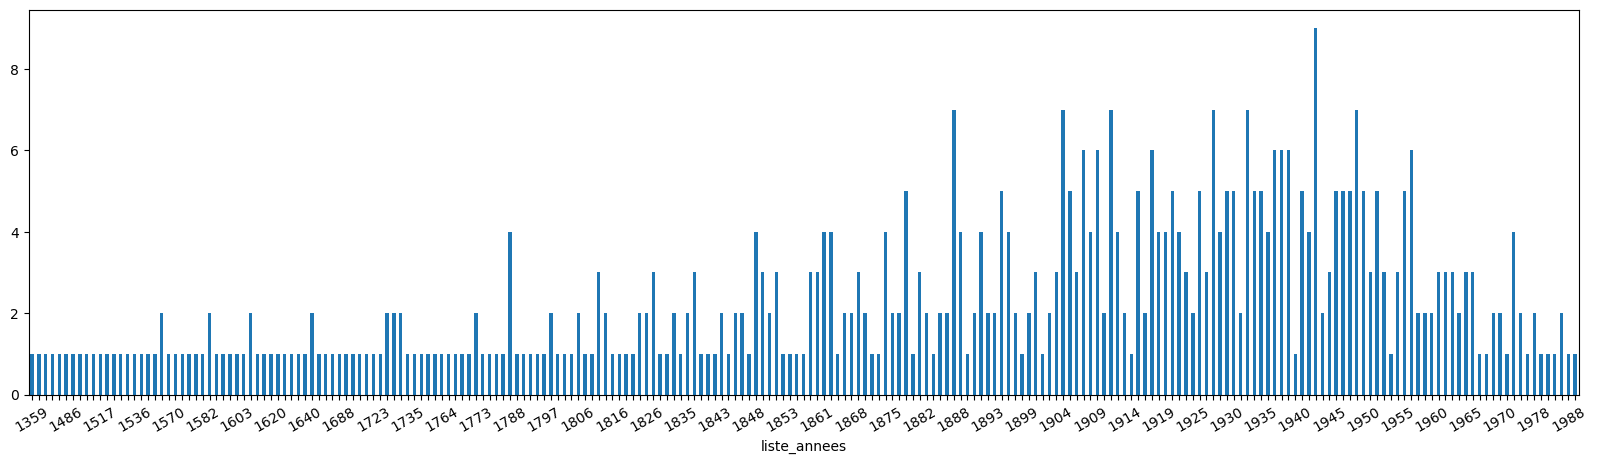

In [116]:
### Group by year and plot
# Beware : a lot of years are missing !
# Avoid this approach !

fig, ax = plt.subplots()


slrg = slr.groupby(by=slr).size()
slrg.plot(kind='bar', figsize=(20, 5))

## specific xticks labels customisation
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=30)        
plt.show()

In [86]:
### Use a different plotting library

import plotly.express as px

fig = px.bar(slrg)
fig.show()

## Create a Pandas dataframe from SQL query

In [ ]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT birth_year 
FROM person p
order by birth_year 
"""

In [124]:
### Création du conteneur du résultat de la requête
cn = sql.connect(db_file)
cur = cn.cursor()

In [125]:
c_df= pd.read_sql_query(q1, cn)
cn.close()
c_df.head()

,birth_year
0,1359
1,1394
2,1447
3,1453
4,1470


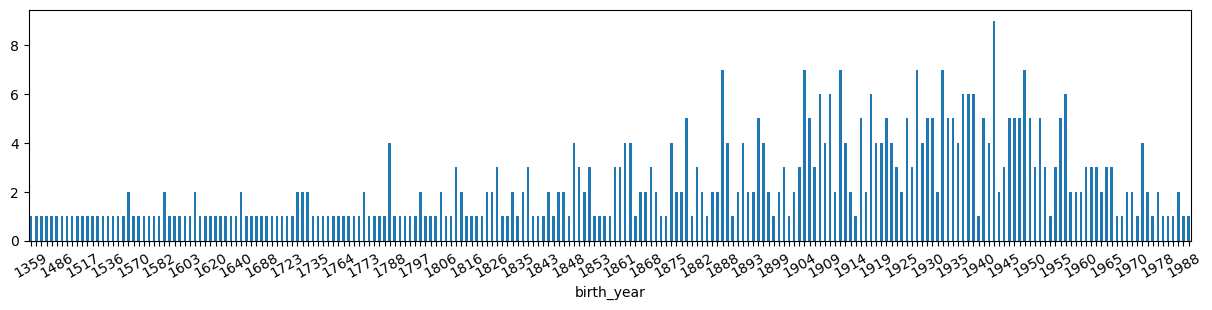

In [127]:
fig, ax = plt.subplots()

## Several actions concatenated in one line of code
c_df.groupby(by="birth_year").size().plot(kind='bar', figsize=(15, 3))

## specific xticks labels customisation
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=30)        
plt.show()

In [ ]:
print(c_df.birth_year.min(), c_df.birth_year.max())

1359 1993


In [ ]:
c_df

,birth_year
0,1359
1,1394
2,1447
3,1453
4,1470
...,...
514,1983
515,1984
516,1984
517,1988


### Codage par période de vingt-cinq ans

In [136]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_25 = list(range(1351, 2002, 25))
print(l_25[:5],l_25[-5:])

[1351, 1376, 1401, 1426, 1451] [1901, 1926, 1951, 1976, 2001]


In [137]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

c_df['periodes'] = pd.cut(c_df['birth_year'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_df['periodes'] = c_df['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_df.head(3)

,birth_year,periodes
0,1359,1351-1375
1,1394,1376-1400
2,1447,1426-1450


In [139]:
### compter les naissances par périodes de 25 ans
c_df.groupby(by='periodes').size().tail()

periodes
1876-1900     56
1901-1925     91
1926-1950    121
1951-1975     60
1976-2000     12
dtype: int64

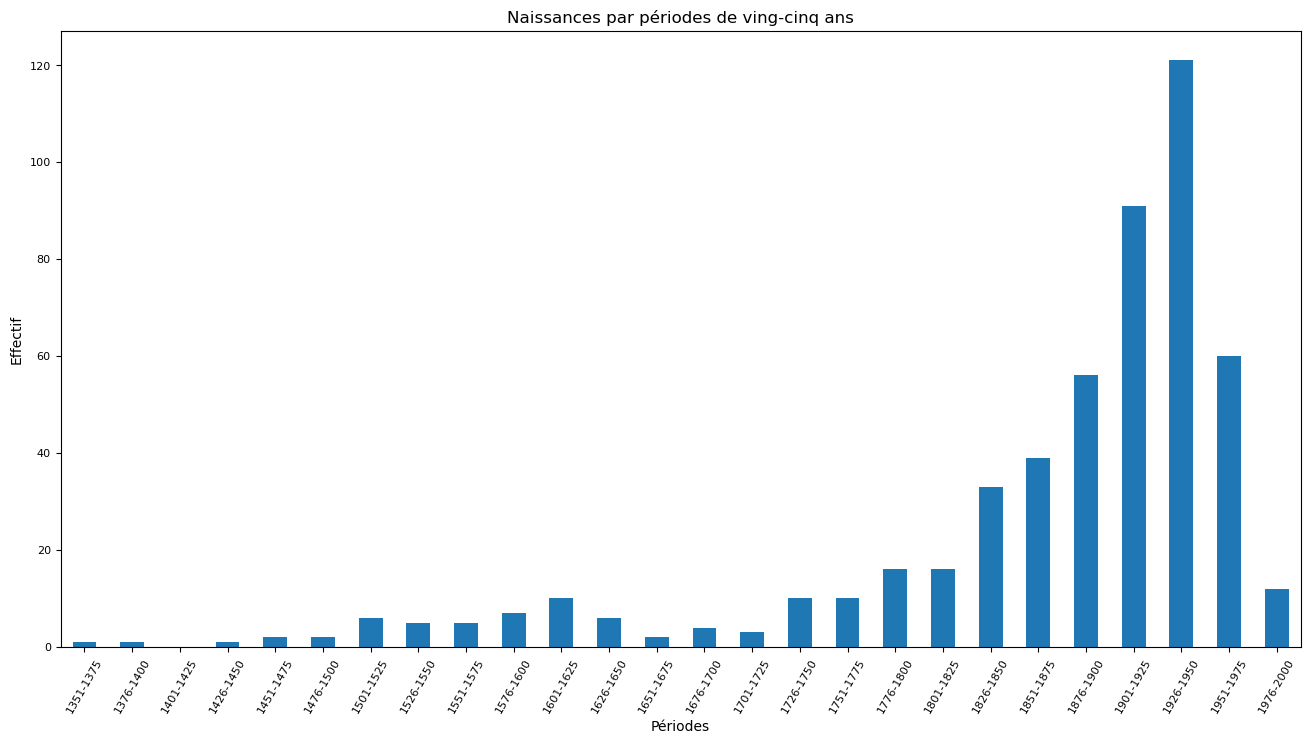

In [146]:
cg_df = c_df.groupby(by='periodes').size()

ax = cg_df.plot(kind='bar',rot=60, fontsize=8, figsize=(16,8))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Naissances par périodes de ving-cinq ans')
plt.show()

In [155]:
### Use a different plotting library


fig = px.bar(cg_df, 
             # https://plotly.com/python/figure-labels/
             title='Effectifs des naissances par périodes de 25 ans',
             labels={'periodes':'Période',
                     'value':'Effectif',
                     'variable':'Effectif'},
                 width=1000, height=300)
fig.write_html("pictures/birth_years_20241208.html")
fig.write_image("pictures/birth_years_20241208.png")
fig.show()